# Student ID: 2200367


Let's install all require libraries.

In [ ]:
!pip install transformers
!pip install datasets
!pip install torchvision
!pip install Tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 19.2 MB/s eta 0:00:0

Let's import all require libraries. 

In [ ]:
import numpy as np
import os
import pandas as pd
import torch
from transformers import AutoTokenizer,AutoModelForSequenceClassification, Trainer, TrainingArguments
from tqdm.notebook import tqdm
import seaborn as sns
import numpy
import io 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

import pickle 
import shutil
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

**Let's put your student id as a variable, that you will use different places**

In [ ]:
student_id = 2200367 # Note this is an interger and you need to input your id

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [ ]:
# set same seeds for all libraries

#numpy seed
np.random.seed(student_id)

# Common Codes 

In this section you will write all common codes, for examples


*   Data read
*   Data Splitting
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output
*   Loading Model and output
*   etc




**Let's first allow the GDrive access and set data and model paths**  

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Add your code to initialize GDrive and data and models paths

# TODO: Fill in the Google Drive path where you uploaded the assignment, data and code
# Example: If your student_id is 1234567 then your directory will be './CE807/Assignment2/1234567/' 

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Assignment2/',str(student_id)) # Make sure to update with your student_id and student_id is an integer
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))


List files:  ['test.csv', 'train.csv', 'models', 'valid.csv', 'train_25.csv', 'train_75.csv', 'train_50.csv', 'code.ipynb']


Let's get all file names

In [ ]:
train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv') # This is 100% of data
train_25_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_25.csv') #Let's assume that you have train 25% file is saved in train_25.csv. Note that this is a dummy file. You have to create your own file.
train_50_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_50.csv')  # This is 50% of data
train_75_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_75.csv') # This is 75% of data


print('Train 25% file: ', train_25_file)
print('Train 50% file: ', train_50_file)
print('Train 75% file: ', train_75_file)
print('Train 100% file: ', train_file)

val_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('Validation file: ', val_file)

test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Test file: ', test_file)

Train 25% file:  gdrive/MyDrive/./CE807/Assignment2/2200367/train_25.csv
Train 50% file:  gdrive/MyDrive/./CE807/Assignment2/2200367/train_50.csv
Train 75% file:  gdrive/MyDrive/./CE807/Assignment2/2200367/train_75.csv
Train 100% file:  gdrive/MyDrive/./CE807/Assignment2/2200367/train.csv
Validation file:  gdrive/MyDrive/./CE807/Assignment2/2200367/valid.csv
Test file:  gdrive/MyDrive/./CE807/Assignment2/2200367/test.csv


Let's set output model directory and file names for model 1

In [ ]:
MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'50') # Model 1 trained using 50% of train data directory
print('Model 1 directory with 50% data: ', MODEL_1_50_DIRECTORY)

MODEL_1_75_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'75') # Model 1 trained using 775% of train data directory
print('Model 1 directory with 75% data: ', MODEL_1_75_DIRECTORY)

MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'100') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 100% data: ', MODEL_1_100_DIRECTORY)


model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)

model_1_50_output_test_file = os.path.join(MODEL_1_50_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 50% of train data: ',model_1_50_output_test_file)

model_1_75_output_test_file = os.path.join(MODEL_1_75_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_75_output_test_file)

model_1_100_output_test_file = os.path.join(MODEL_1_100_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 100% of train data: ',model_1_100_output_test_file)


# You need to do this for both models and all data sizes 

Model 1 directory:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/25
Model 1 directory with 50% data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/50
Model 1 directory with 75% data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/75
Model 1 directory with 100% data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/100
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/25/output_test.csv
Output file name using model 1 using 50% of train data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/50/output_test.csv
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/75/output_test.csv
Output file name using model 1 using 100% of train data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/100/output_test.csv


Let's set output model directory and file names for model 2

In [ ]:
MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2') # Model 1 directory
print('Model 2 directory: ', MODEL_2_DIRECTORY)

MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 2 directory with 25% data: ', MODEL_2_25_DIRECTORY)

MODEL_2_50_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'50') # Model 1 trained using 50% of train data directory
print('Model 2 directory with 50% data: ', MODEL_2_50_DIRECTORY)

MODEL_2_75_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'75') # Model 1 trained using 775% of train data directory
print('Model 2 directory with 75% data: ', MODEL_2_75_DIRECTORY)

MODEL_2_100_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'100') # Model 1 trained using 25% of train data directory
print('Model 2 directory with 100% data: ', MODEL_2_100_DIRECTORY)


model_2_25_output_test_file = os.path.join(MODEL_2_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 2 using 25% of train data: ',model_2_25_output_test_file)

model_2_50_output_test_file = os.path.join(MODEL_2_50_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 2 using 50% of train data: ',model_2_50_output_test_file)

model_2_75_output_test_file = os.path.join(MODEL_2_75_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 2 using 25% of train data: ',model_2_75_output_test_file)

model_2_100_output_test_file = os.path.join(MODEL_2_100_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 2 using 100% of train data: ',model_2_100_output_test_file)

Model 2 directory:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2
Model 2 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/25
Model 2 directory with 50% data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/50
Model 2 directory with 75% data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/75
Model 2 directory with 100% data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/100
Output file name using model 2 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/25/output_test.csv
Output file name using model 2 using 50% of train data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/50/output_test.csv
Output file name using model 2 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/75/output_test.csv
Output file name using model 2 using 100% of train data:  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/100/output_test.csv


Reading training file

In [ ]:
df = pd.read_csv(train_file)
df.head()

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF


Checking distribution of label

In [ ]:
print(df['label'].value_counts(normalize=True)*100)

NOT    66.766832
OFF    33.233168
Name: label, dtype: float64


Divide training data into equal 4 batches and check if the ratio of label is distributed equally

In [ ]:
# divide the DataFrame into 4 equal batches randomly
batch_size = len(df) // 4
print(batch_size)
batches = [df[i:i+batch_size] for i in np.random.permutation(range(0, len(df), batch_size))]

# one batch will not be equal to batch_size if len(df) is not divisible by batch_size
# we are deleting that batch which  size will be len(df) % batch_size
for i in range(len(batches)):
    if len(batches[i]) < batch_size:
        batches = np.delete(batches, i, axis = 0)
        break

# print the batches
for i, batch in enumerate(batches):
    print(f'Batch {i+1}: {len(batch)}')
    print(batch["label"].value_counts(normalize=True)*100)

3078
Batch 1: 3078
NOT    66.11436
OFF    33.88564
Name: label, dtype: float64
Batch 2: 3078
NOT    68.421053
OFF    31.578947
Name: label, dtype: float64
Batch 3: 3078
NOT    66.439246
OFF    33.560754
Name: label, dtype: float64
Batch 4: 3078
NOT    66.11436
OFF    33.88564
Name: label, dtype: float64


Save all the batches in the directory

In [ ]:
train_25 = batches[0]
train_50 = pd.concat([batches[0],batches[1]])
train_75 = pd.concat([batches[0],batches[1],batches[2]])

print("Train 25 length: ", len(train_25))
print(train_25['label'].value_counts(normalize=True)*100)

print("Train 50 length: ", len(train_50))
print(train_50['label'].value_counts(normalize=True)*100)

print("Train 75 length: ", len(train_75))
print(train_75['label'].value_counts(normalize=True)*100)

train_25.to_csv(train_25_file)
train_50.to_csv(train_50_file)
train_75.to_csv(train_75_file)

Train 25 length:  3078
NOT    66.11436
OFF    33.88564
Name: label, dtype: float64
Train 50 length:  6156
NOT    67.267706
OFF    32.732294
Name: label, dtype: float64
Train 75 length:  9234
NOT    66.991553
OFF    33.008447
Name: label, dtype: float64


We are going to use different performance matrics like Accuracy, Recall (macro), Precision (macro), F1 (macro) and Confusion Matrix for the performance evaluation. We will print all the matrics and display Confusion Matrix with proper X & Y axis labels

In [ ]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    sp = plt.subplot() 
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=["NOT", "OFF"]
               ,xticklabels=["NOT", "OFF"],cmap='Blues', fmt='g', ax=sp)
    sp.set_xlabel('Predicted labels')
    sp.set_ylabel('True labels') 
    plt.tight_layout()
    
    plt.show()

def compute_performance(y_true, y_pred, split='test'):
    """
    prints different performance matrics like  Accuracy, Recall (macro), Precision (macro), and F1 (macro).
    This also display Confusion Matrix with proper X & Y axis labels.
    Also, returns F1 score

    Args:
        y_true: numpy array or list
        y_pred: numpy array or list
        split: str
        

    Returns:
        float
    """

    print('Computing different preformance metrics on', split, ' set of Dataset')
    f1score=f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')

    plot_confusionmatrix(y_pred, y_true, split.upper())
    
    print('F1 Score(macro): ', f1score)
    print('Accuracy: ', acc)
    print('Recall(macro): ', recall)
    print('Precision(macro): ', precision)

    return f1score

# Method 1 Start

Utility functions and classes



In [ ]:
# Name of the huggingface model
model_ckpt = "cardiffnlp/twitter-roberta-base-offensive"

# Remove folder or file from the path
def remove_file_dir(path):
    if os.path.exists(path):
        if os.path.isfile(path):
            os.remove(path)
        else:
            shutil.rmtree(path, ignore_errors=True)

# Subclassing dataset so that we can pass our custom dataset to hugging face trainer to finetune the pretrained model
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['label'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Compute function for huggingface trainer to show result as each iteration goes by. 
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="macro")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1 (macro)": f1}

## Training code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best. 

Preprocessing of tweet before tokinzation

In [ ]:
def preprocess(text):
    preprocessed_text = []
    for t in text.split():
        if len(t) > 1:
            t = '@user' if t[0] == '@' and t.count('@') == 1 else t
            t = 'http' if t.startswith('http') else t
        preprocessed_text.append(t)
    return ' '.join(preprocessed_text)

Creating dataset to pass to model. Also tokenizing 'tweet' and make 'label' string to integer.

In [ ]:
def prepare_dataset1(data, tokenizer):
    texts = data["tweet"].to_list()
    labels = data["label"].to_list()

    for idx in tqdm(range(len(texts))):
        texts[idx] = preprocess(texts[idx])

    for idx in tqdm(range(len(labels))):
        labels[idx] = 0 if labels[idx] == "NOT" else 1

    encodings = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    dataset = CustomDataset(encodings, labels)

    return dataset



Huggingface finetuning pretrained model

In [ ]:
def train_model1(train_dataset, val_dataset):
    # take train and validation dataset and finetune pretrained model 
    num_labels = 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Training Device: ", device)

    model = (AutoModelForSequenceClassification
            .from_pretrained(model_ckpt, num_labels=num_labels)
            .to(device))
    
    batch_size = 32
    logging_steps = len(train_dataset) // batch_size
    model_name = f"{model_ckpt}-finetuned-tweet_eval-offensive"
    training_args = TrainingArguments(output_dir=model_name,
                                    num_train_epochs=2,
                                    learning_rate=2e-5,
                                    per_device_train_batch_size=batch_size,
                                    per_device_eval_batch_size=batch_size,
                                    evaluation_strategy="epoch",
                                    disable_tqdm=False,
                                    logging_steps=logging_steps,
                                    push_to_hub=False,
                                    seed = 42,
                                    adam_epsilon = 1e-08,
                                    adam_beta1 = 0.9,
                                    adam_beta2 = 0.999,
                                    lr_scheduler_type = "linear",
                                    log_level="error")

    trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=train_dataset,
                  eval_dataset=val_dataset)
    trainer.train()

    return trainer


Saving finetuned model and tokenizer using huggingface

In [ ]:
def save_model1(trainer, tokenizer, model_dir):

    # save the model to disk
    model_file = os.path.join(model_dir, 'model.sav')
    remove_file_dir(model_file)
    trainer.save_model(model_file)

    vectorizer_file = os.path.join(model_dir, 'vectorizer.sav')
    remove_file_dir(vectorizer_file)
    tokenizer.save_pretrained(vectorizer_file) 

    print('Saved model to ', model_file)
    print('Saved Vectorizer to ', vectorizer_file)

    return model_file, vectorizer_file 

Loading finetuned model and tokenizer using  huggingface 

In [ ]:
def load_model1(model_file, vectorizer_file):
    # load model and vectorizer from disk

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Training Device: ", device)

    model = (AutoModelForSequenceClassification
            .from_pretrained(model_file))
    trainer = Trainer(model=model)

    print('Loaded model from ', model_file)

    tokenizer = AutoTokenizer.from_pretrained(vectorizer_file)
    print('Loaded Vectorizer from ', vectorizer_file)


    return trainer, tokenizer

Train model, save in the disk and return model  and tokenizer directory

In [ ]:
def train_method1(train_file, val_file, model_dir):
    """
     Takes train_file, val_file and model_dir as input.
     It trained on the train_file datapoints, and validate on the val_file datapoints.
     While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
     After finishing the training, it saved the best model in the model_dir.

     ADD Other arguments, if needed.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory
    
    """

    train_df = pd.read_csv(train_file)
    valid_df = pd.read_csv(val_file)

    tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
 
    train_dataset = prepare_dataset1(train_df, tokenizer)
    val_dataset = prepare_dataset1(valid_df, tokenizer)

    trainer = train_model1(train_dataset, val_dataset)

    model_file, vectorizer_file = save_model1(trainer, tokenizer, model_dir)

    train_predictions, train_labels, metrics = trainer.predict(train_dataset, metric_key_prefix="predict")
    print("Training matrics: ")
    print(metrics)
    train_labels_pred = train_predictions.argmax(-1)
    train_f1_score = compute_performance(train_labels, train_labels_pred, split='train')

    val_predictions, val_labels, metrics = trainer.predict(val_dataset, metric_key_prefix="predict")
    print("Validation matrics: ")
    print(metrics)
    val_labels_pred = val_predictions.argmax(-1)
    val_f1_score = compute_performance(val_labels, val_labels_pred, split='valid')
    
    return model_file, vectorizer_file

Let's train using 25% of data. Notice file and directory names.

Train using of 25% of data


  0%|          | 0/3078 [00:00<?, ?it/s]

  0%|          | 0/3078 [00:00<?, ?it/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


  0%|          | 0/927 [00:00<?, ?it/s]

  0%|          | 0/927 [00:00<?, ?it/s]

Training Device:  cuda


Epoch,Training Loss,Validation Loss,Accuracy,F1 (macro)
1,0.349400,0.367895,0.841424,0.825753
2,0.252100,0.393279,0.844660,0.829670


Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/25/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/25/vectorizer.sav


Training matrics: 
{'predict_loss': 0.20355817675590515, 'predict_accuracy': 0.9249512670565302, 'predict_f1 (macro)': 0.9172500044516276, 'predict_runtime': 27.1552, 'predict_samples_per_second': 113.348, 'predict_steps_per_second': 3.572}
Computing different preformance metrics on train  set of Dataset
TRAIN Confusion matrix


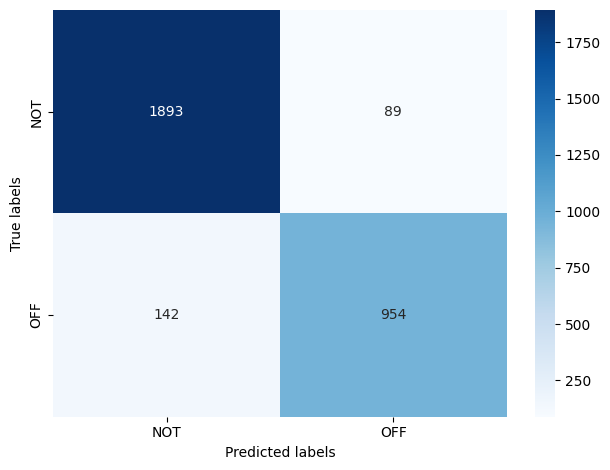

F1 Score(macro):  0.9172500044516276
Accuracy:  0.9249512670565302
Recall(macro):  0.922445176807593
Precision(macro):  0.9127669094846318


Validation matrics: 
{'predict_loss': 0.3932793140411377, 'predict_accuracy': 0.8446601941747572, 'predict_f1 (macro)': 0.8296703857578882, 'predict_runtime': 7.4628, 'predict_samples_per_second': 124.217, 'predict_steps_per_second': 3.886}
Computing different preformance metrics on valid  set of Dataset
VALID Confusion matrix


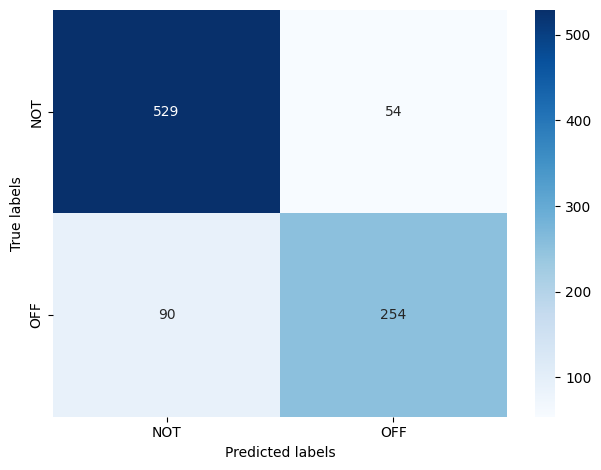

F1 Score(macro):  0.8296703857578882
Accuracy:  0.8446601941747572
Recall(macro):  0.8396397624992132
Precision(macro):  0.8228738681239778


In [ ]:
print('Train using of 25% of data')
model_1_25_file, vectorizer_1_25_file = train_method1(train_25_file, val_file, MODEL_1_25_DIRECTORY)

Let's train using 50% of data. Notice file and directory names.

Train using of 50% of data


  0%|          | 0/6156 [00:00<?, ?it/s]

  0%|          | 0/6156 [00:00<?, ?it/s]

  0%|          | 0/927 [00:00<?, ?it/s]

  0%|          | 0/927 [00:00<?, ?it/s]

Training Device:  cuda


Epoch,Training Loss,Validation Loss,Accuracy,F1 (macro)
1,0.352600,0.374769,0.833873,0.819088
2,0.263500,0.383794,0.844660,0.828695


Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/50/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/50/vectorizer.sav


Training matrics: 
{'predict_loss': 0.2037208527326584, 'predict_accuracy': 0.9264132553606238, 'predict_f1 (macro)': 0.9175830815781401, 'predict_runtime': 56.8252, 'predict_samples_per_second': 108.332, 'predict_steps_per_second': 3.396}
Computing different preformance metrics on train  set of Dataset
TRAIN Confusion matrix


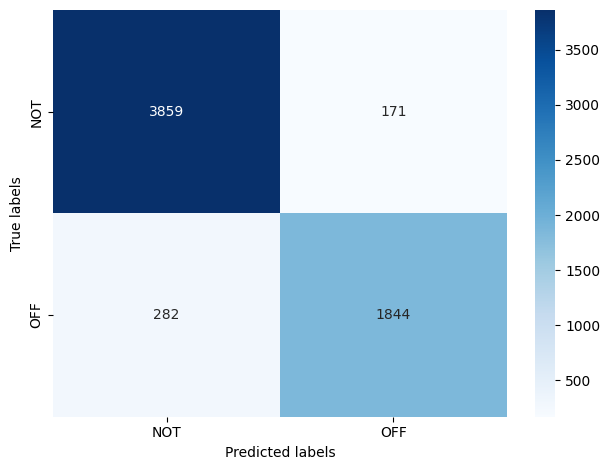

F1 Score(macro):  0.9175830815781401
Accuracy:  0.9264132553606238
Recall(macro):  0.9235184917753411
Precision(macro):  0.9124623881565587


Validation matrics: 
{'predict_loss': 0.3837944567203522, 'predict_accuracy': 0.8446601941747572, 'predict_f1 (macro)': 0.8286946255325702, 'predict_runtime': 7.3924, 'predict_samples_per_second': 125.398, 'predict_steps_per_second': 3.923}
Computing different preformance metrics on valid  set of Dataset
VALID Confusion matrix


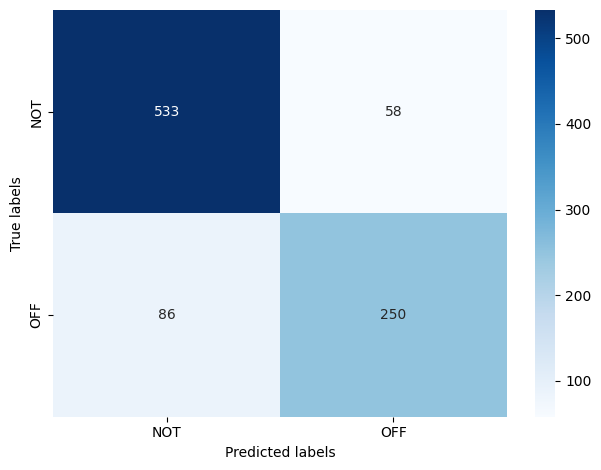

F1 Score(macro):  0.8286946255325702
Accuracy:  0.8446601941747572
Recall(macro):  0.8363772737763044
Precision(macro):  0.8229544355813392


In [ ]:
print('Train using of 50% of data')
model_1_50_file, vectorizer_1_50_file = train_method1(train_50_file, val_file, MODEL_1_50_DIRECTORY)

Let's train using 75% of data. Notice file and directory names.

Train using of 75% of data


  0%|          | 0/9234 [00:00<?, ?it/s]

  0%|          | 0/9234 [00:00<?, ?it/s]

  0%|          | 0/927 [00:00<?, ?it/s]

  0%|          | 0/927 [00:00<?, ?it/s]

Training Device:  cuda


Epoch,Training Loss,Validation Loss,Accuracy,F1 (macro)
1,0.354300,0.352930,0.854369,0.835494
2,0.263900,0.383933,0.847896,0.832385


Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/75/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/75/vectorizer.sav


Training matrics: 
{'predict_loss': 0.20334981381893158, 'predict_accuracy': 0.9261425167857916, 'predict_f1 (macro)': 0.9177222975924947, 'predict_runtime': 85.0194, 'predict_samples_per_second': 108.611, 'predict_steps_per_second': 3.399}
Computing different preformance metrics on train  set of Dataset
TRAIN Confusion matrix


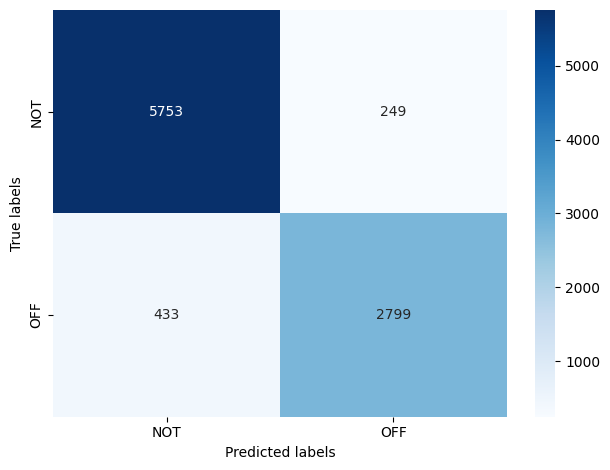

F1 Score(macro):  0.9177222975924947
Accuracy:  0.9261425167857916
Recall(macro):  0.9241551598605946
Precision(macro):  0.9122705282232655


Validation matrics: 
{'predict_loss': 0.3839329779148102, 'predict_accuracy': 0.8478964401294499, 'predict_f1 (macro)': 0.832385019331756, 'predict_runtime': 7.384, 'predict_samples_per_second': 125.542, 'predict_steps_per_second': 3.927}
Computing different preformance metrics on valid  set of Dataset
VALID Confusion matrix


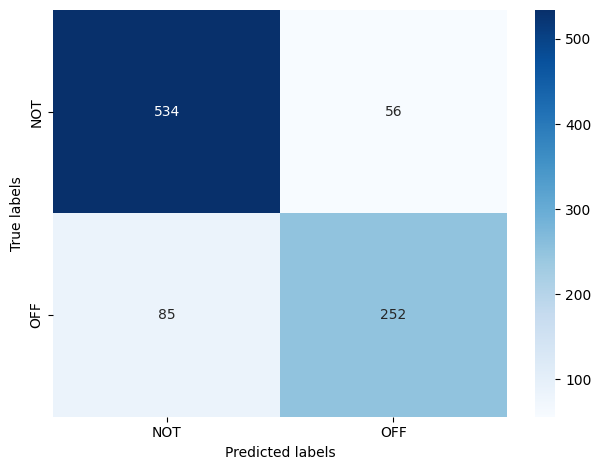

F1 Score(macro):  0.832385019331756
Accuracy:  0.8478964401294499
Recall(macro):  0.8404317814657072
Precision(macro):  0.826429613237439


In [ ]:
print('Train using of 75% of data')
model_1_75_file, vectorizer_1_75_file = train_method1(train_75_file, val_file, MODEL_1_75_DIRECTORY)

Let's train using 100% of data. Notice file and directory names.

Train using of 100% of data


  0%|          | 0/12313 [00:00<?, ?it/s]

  0%|          | 0/12313 [00:00<?, ?it/s]

  0%|          | 0/927 [00:00<?, ?it/s]

  0%|          | 0/927 [00:00<?, ?it/s]

Training Device:  cuda


Epoch,Training Loss,Validation Loss,Accuracy,F1 (macro)
1,0.359400,0.350027,0.843581,0.828367
2,0.265700,0.391531,0.847896,0.831647


Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/100/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/100/vectorizer.sav


Training matrics: 
{'predict_loss': 0.2012689709663391, 'predict_accuracy': 0.9273125964427841, 'predict_f1 (macro)': 0.9190022525697414, 'predict_runtime': 132.1702, 'predict_samples_per_second': 93.16, 'predict_steps_per_second': 2.913}
Computing different preformance metrics on train  set of Dataset
TRAIN Confusion matrix


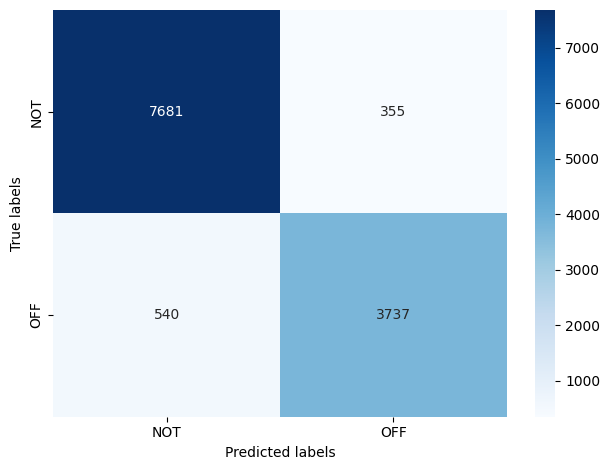

F1 Score(macro):  0.9190022525697414
Accuracy:  0.9273125964427841
Recall(macro):  0.9237799585331083
Precision(macro):  0.9147835354652021


Validation matrics: 
{'predict_loss': 0.39153051376342773, 'predict_accuracy': 0.8478964401294499, 'predict_f1 (macro)': 0.8316466701443226, 'predict_runtime': 7.4095, 'predict_samples_per_second': 125.109, 'predict_steps_per_second': 3.914}
Computing different preformance metrics on valid  set of Dataset
VALID Confusion matrix


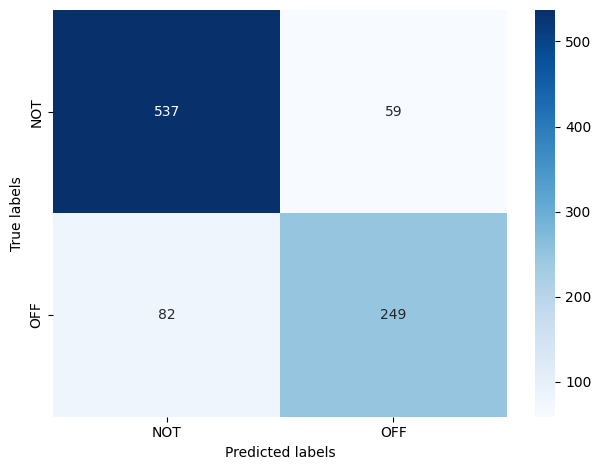

F1 Score(macro):  0.8316466701443226
Accuracy:  0.8478964401294499
Recall(macro):  0.8379849149235256
Precision(macro):  0.8266362862182931


In [ ]:
print('Train using of 100% of data')
model_1_100_file, vectorizer_1_100_file = train_method1(train_file, val_file, MODEL_1_100_DIRECTORY)

## Testing code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [ ]:
def test_method1(test_file, model_file, vectorizer_file, output_dir):
    """
     take test_file, model_file and output_dir as input.
     It loads model and test of the examples in the test_file.
     It prints different evaluation metrics, and saves the output in output directory

     ADD Other arguments, if needed

    Args:
        test_file: Test file name
        model_file: Model file name
        vectorizer_file: Vectorizer file name
        output_dir: Output Directory
    
    """

    test_df = pd.read_csv(test_file)
    
    test_label = test_df['label']

    trainer, vectorizer = load_model1(model_file, vectorizer_file) 

    test_dataset = prepare_dataset1(test_df,vectorizer)

    train_predictions, test_label, metrics = trainer.predict(test_dataset, metric_key_prefix="predict")
    test_pred_label = train_predictions.argmax(-1)

    test_df['out_label']  = test_pred_label # Note how this is saved 
    test_df['out_label'] = test_df['out_label'].map({0:'NOT',1:'OFF'})
    

    test_f1_score = compute_performance(test_label, test_pred_label, split='test')

    out_file = os.path.join(output_dir, 'output_test.csv')

    print('Saving model output to', out_file)
    test_df.to_csv(out_file)

    
    # return 

Let's test using model trained on 100% data

Let's test using model trained on 25% data. 

Testing using model trained on 25% data
Training Device:  cuda
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/25/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/25/vectorizer.sav


  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

Computing different preformance metrics on test  set of Dataset
TEST Confusion matrix


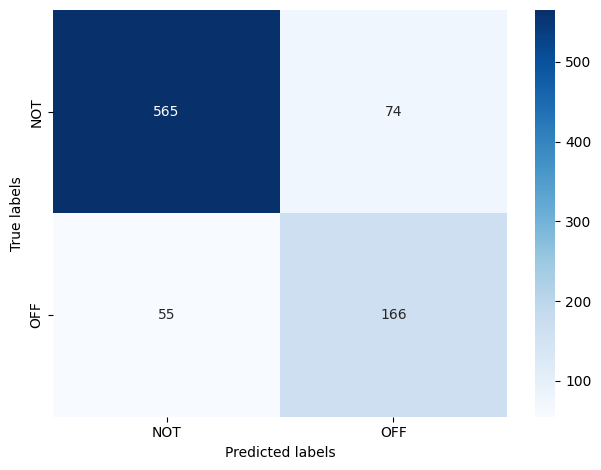

F1 Score(macro):  0.8088556320737974
Accuracy:  0.85
Recall(macro):  0.801478494623656
Precision(macro):  0.8176626374637974
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/25/output_test.csv


In [ ]:
print('Testing using model trained on 25% data')
test_method1(test_file, model_1_25_file, vectorizer_1_25_file, MODEL_1_25_DIRECTORY)

Let's see output of model trained on 25% data

In [ ]:
out_df = pd.read_csv(model_1_25_output_test_file)
out_df.head()

,Unnamed: 0,id,tweet,label,out_label
0,0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,OFF
1,1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT


Let's test using model trained on 50% data. 

Testing using model trained on 50% data
Training Device:  cuda
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/50/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/50/vectorizer.sav


  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

Computing different preformance metrics on test  set of Dataset
TEST Confusion matrix


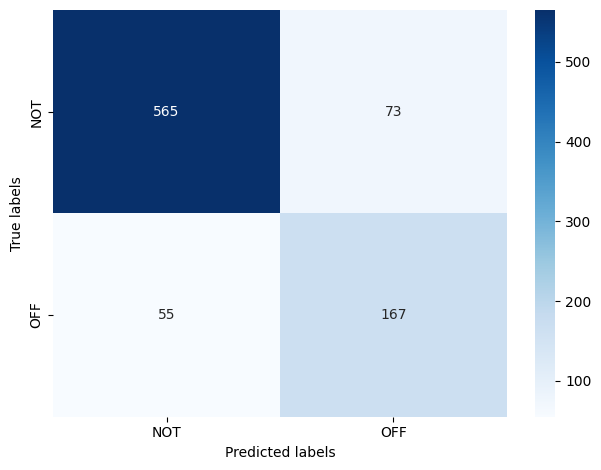

F1 Score(macro):  0.8105974576562811
Accuracy:  0.8511627906976744
Recall(macro):  0.8035618279569892
Precision(macro):  0.8189160947781637
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/50/output_test.csv


In [ ]:
print('Testing using model trained on 50% data')
test_method1(test_file, model_1_50_file, vectorizer_1_50_file, MODEL_1_50_DIRECTORY)

Let's see output of model trained on 50% data

In [ ]:
out_df = pd.read_csv(model_1_50_output_test_file)
out_df.head()

,Unnamed: 0,id,tweet,label,out_label
0,0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,OFF
1,1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT


Let's test using model trained on 75% data. 

Testing using model trained on 75% data
Training Device:  cuda
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/75/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/75/vectorizer.sav


  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

Computing different preformance metrics on test  set of Dataset
TEST Confusion matrix


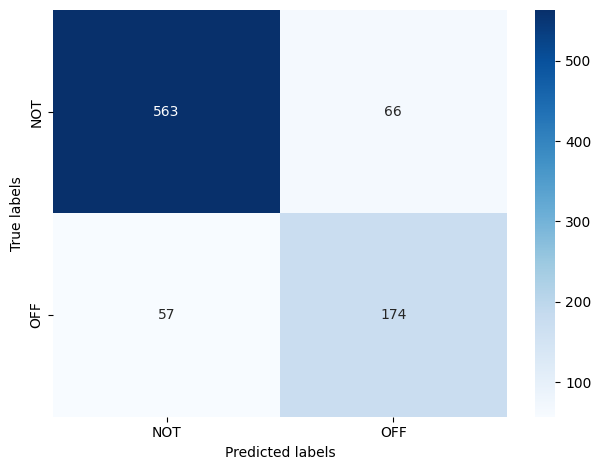

F1 Score(macro):  0.820187360079146
Accuracy:  0.8569767441860465
Recall(macro):  0.8165322580645161
Precision(macro):  0.8241591476885595
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/75/output_test.csv


In [ ]:
print('Testing using model trained on 75% data')
test_method1(test_file, model_1_75_file, vectorizer_1_75_file, MODEL_1_75_DIRECTORY)

Let's see output of model trained on 75% data

In [ ]:
out_df = pd.read_csv(model_1_75_output_test_file)
out_df.head()

,Unnamed: 0,id,tweet,label,out_label
0,0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,OFF
1,1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT


Let's test using model trained on 100% data. 

Testing using model trained on 100% data
Training Device:  cuda
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/100/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/100/vectorizer.sav


  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

Computing different preformance metrics on test  set of Dataset
TEST Confusion matrix


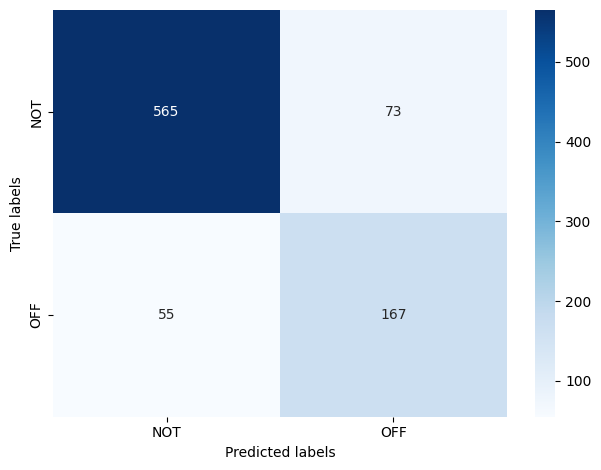

F1 Score(macro):  0.8105974576562811
Accuracy:  0.8511627906976744
Recall(macro):  0.8035618279569892
Precision(macro):  0.8189160947781637
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2200367/models/1/100/output_test.csv


In [ ]:
print('Testing using model trained on 100% data')
test_method1(test_file, model_1_100_file, vectorizer_1_100_file, MODEL_1_100_DIRECTORY)

Let's see output of model trained on 100%  data

In [ ]:
out_df = pd.read_csv(model_1_100_output_test_file)
out_df.head()

,Unnamed: 0,id,tweet,label,out_label
0,0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,OFF
1,1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT


## Method 1 End


# Method 2

Function to vectorizing the data, see the difference training and other cases.

In [ ]:
def prepare_dataset2(data, count_vectorizer=None, split='test'):
  if split == 'train':
      count_vectorizer = CountVectorizer(stop_words='english',max_features=5000) 
      values = count_vectorizer.fit_transform(data['tweet'].values) #TODO: This is the best way to do this, because you need to use same vectorization menthod
  else:
      values = count_vectorizer.transform(data['tweet'].values)

  if split == 'train':
      return values, count_vectorizer
  else:
      return values

MLP neural network training

In [ ]:
def train_model2(text_vector,label):
    print('Let\'s start training MLP')
    classifier = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    max_iter=150,
                    early_stopping = True,
                    hidden_layer_sizes=(256,128,64,32), 
                    random_state=1) 
    classifier.fit(text_vector, label)

    return classifier

Save model and count vectorizer as pickel in GDrive

In [ ]:
def save_model2(model, vectorizer, model_dir):
    # save the model to disk
    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(model, open(model_file, 'wb'))

    print('Saved model to ', model_file)

    vectorizer_file = os.path.join(model_dir, 'vectorizer.sav') 
    pickle.dump(vectorizer, open(vectorizer_file, 'wb'))

    print('Saved Vectorizer to ', vectorizer_file)

    return model_file, vectorizer_file 

Load model and count vectorizer as pickel from GDrive

In [ ]:
def load_model2(model_file, vectorizer_file):
    # load model and vectorizer from disk

    model = pickle.load(open(model_file, 'rb'))

    print('Loaded model from ', model_file)

    vectorizer = pickle.load(open(vectorizer_file, 'rb'))

    print('Loaded Vectorizer from ', vectorizer_file)


    return model, vectorizer

Training, saving and return directory of vectorizer and model

In [ ]:
def train_method2(train_file, val_file, model_dir):
    """
     Takes train_file, val_file and model_dir as input.
     It trained on the train_file datapoints, and validate on the val_file datapoints.
     While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
     After finishing the training, it saved the best model in the model_dir.

     ADD Other arguments, if needed.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory
    
    """
    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)

    train_label = train_df['label']
    val_label = val_df['label']

    train_values, count_vectorizer = prepare_dataset2(train_df, split='train') 
    val_values= prepare_dataset2(val_df,count_vectorizer)
    model = train_model2(train_values,train_label)
    

    model_file, vectorizer_file = save_model2(model, count_vectorizer, model_dir)

    train_pred_label = model.predict(train_values)
    val_pred_label = model.predict(val_values)

    # print('Train Split')
    train_f1_score = compute_performance(train_label, train_pred_label, split='train')

    # print('Validation Split')
    val_f1_score = compute_performance(val_label, val_pred_label, split='valid')


    return model_file, vectorizer_file

Let's train using 25% of data. Notice file and directory names.

Train using of 25% of data
Let's start training MLP
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/25/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/25/vectorizer.sav
Computing different preformance metrics on train  set of Dataset
TRAIN Confusion matrix


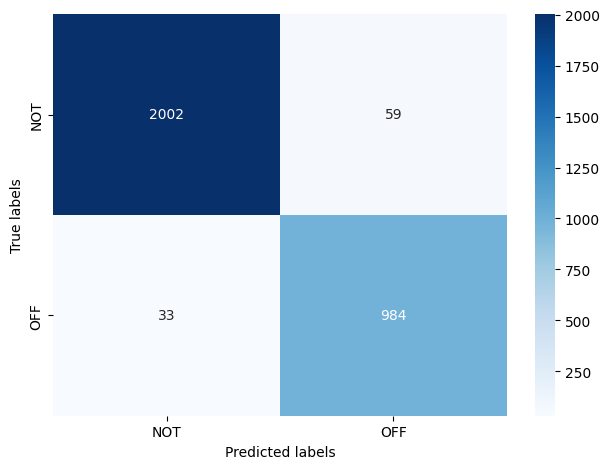

F1 Score(macro):  0.9664394341626215
Accuracy:  0.9701104613385315
Recall(macro):  0.9636080951517194
Precision(macro):  0.9694623711318073
Computing different preformance metrics on valid  set of Dataset
VALID Confusion matrix


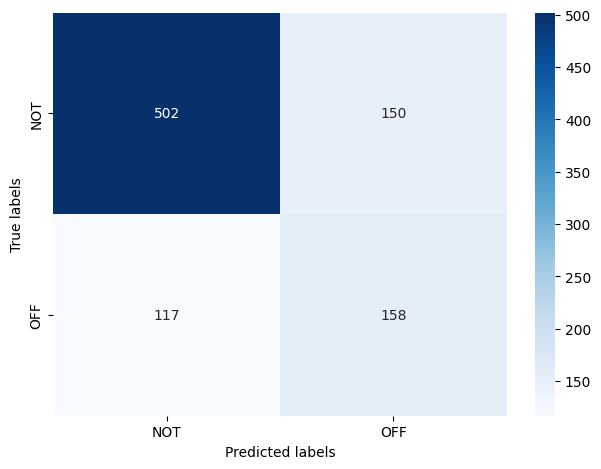

F1 Score(macro):  0.6659766016683019
Accuracy:  0.7119741100323624
Recall(macro):  0.6619862367035226
Precision(macro):  0.6722420524261015


In [ ]:
print('Train using of 25% of data')
model_2_25_file, vectorizer_2_25_file = train_method2(train_25_file, val_file, MODEL_2_25_DIRECTORY)

Let's train using 50% of data. Notice file and directory names.

Train using of 50% of data
Let's start training MLP
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/50/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/50/vectorizer.sav
Computing different preformance metrics on train  set of Dataset
TRAIN Confusion matrix


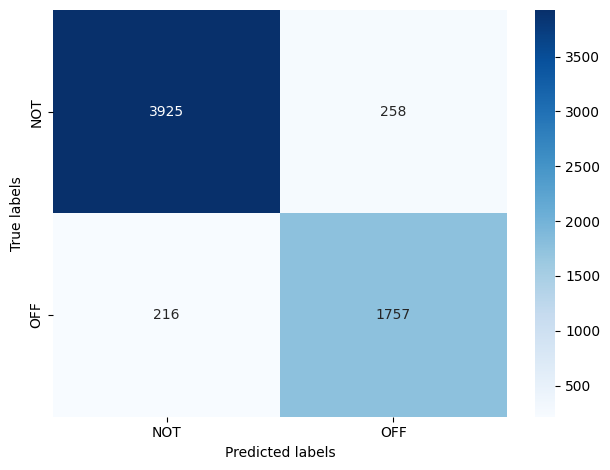

F1 Score(macro):  0.9120998266302993
Accuracy:  0.9230019493177388
Recall(macro):  0.9098994920372022
Precision(macro):  0.914421913135481
Computing different preformance metrics on valid  set of Dataset
VALID Confusion matrix


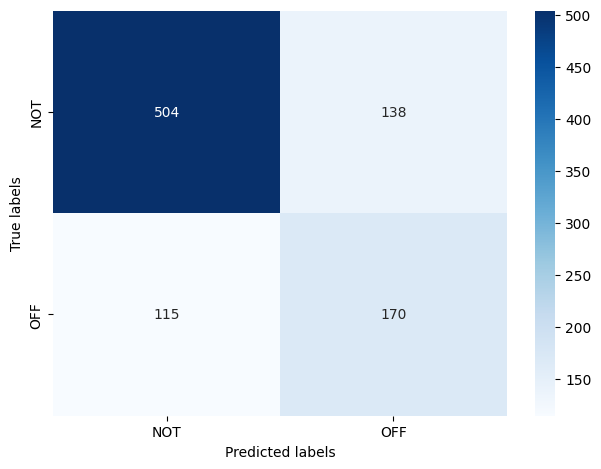

F1 Score(macro):  0.6863607003729741
Accuracy:  0.727076591154261
Recall(macro):  0.683082265069341
Precision(macro):  0.690768978521069


In [ ]:
print('Train using of 50% of data')
model_2_50_file, vectorizer_2_50_file = train_method2(train_50_file, val_file, MODEL_2_50_DIRECTORY)

Let's train using 75% of data. Notice file and directory names.

Train using of 75% of data
Let's start training MLP
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/75/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/75/vectorizer.sav
Computing different preformance metrics on train  set of Dataset
TRAIN Confusion matrix


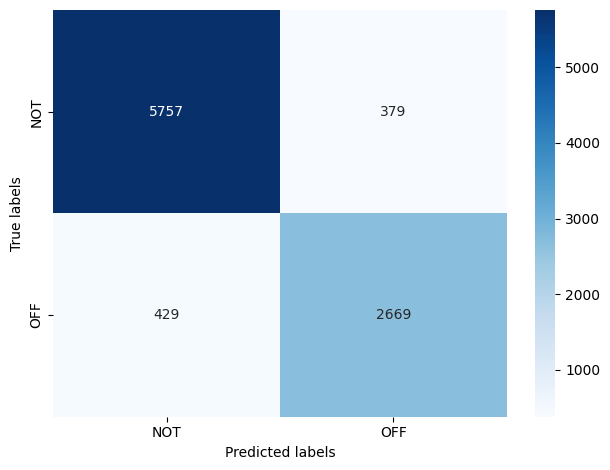

F1 Score(macro):  0.9014793041455724
Accuracy:  0.9124972926142517
Recall(macro):  0.9031530112445935
Precision(macro):  0.8998784701910556
Computing different preformance metrics on valid  set of Dataset
VALID Confusion matrix


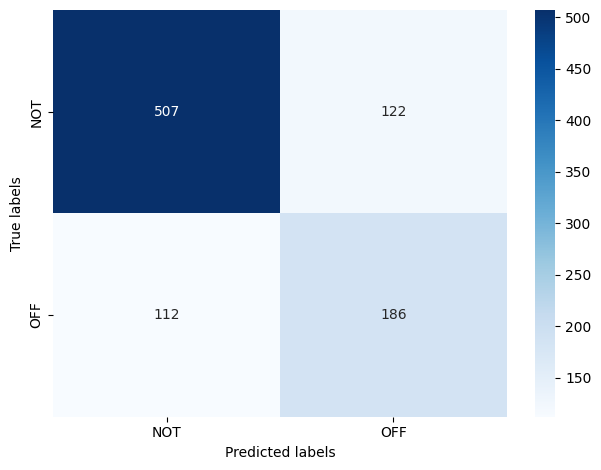

F1 Score(macro):  0.713180693069307
Accuracy:  0.7475728155339806
Recall(macro):  0.7114795543713153
Precision(macro):  0.7151012046393017


In [ ]:
print('Train using of 75% of data')
model_2_75_file, vectorizer_2_75_file = train_method2(train_75_file, val_file, MODEL_2_75_DIRECTORY)

Let's train using 100% of data. Notice file and directory names.

Train using of 100% of data
Let's start training MLP
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/100/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/100/vectorizer.sav
Computing different preformance metrics on train  set of Dataset
TRAIN Confusion matrix


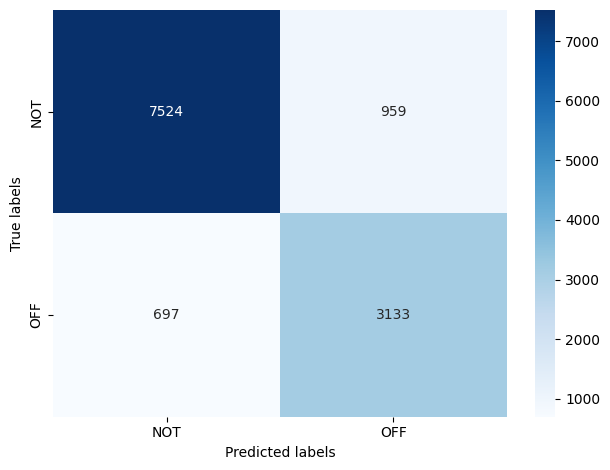

F1 Score(macro):  0.8459119736395372
Accuracy:  0.8655079996751401
Recall(macro):  0.8404287002875002
Precision(macro):  0.8524830185636209
Computing different preformance metrics on valid  set of Dataset
VALID Confusion matrix


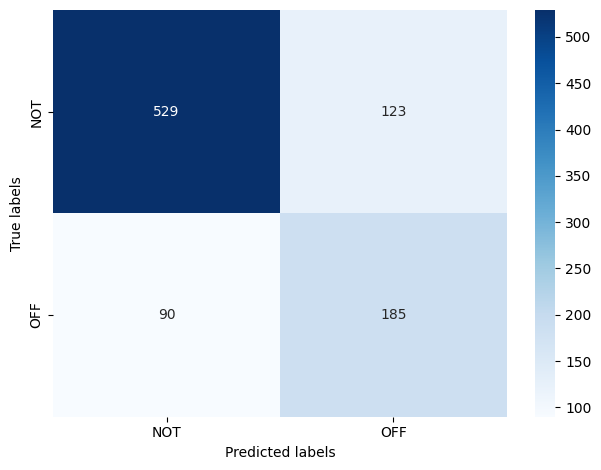

F1 Score(macro):  0.7335318957129149
Accuracy:  0.7702265372168284
Recall(macro):  0.7276267754862262
Precision(macro):  0.7420384829894032


In [ ]:
print('Train using of 100% of data')
model_2_100_file, vectorizer_2_100_file = train_method2(train_file, val_file, MODEL_2_100_DIRECTORY)

##Testing Code

Load both model and vectorization files, and generate output based on inputs. Then you will print / display/ plot all performance metrics, and save the output file in the output_dir

In [ ]:
def test_method2(test_file, model_file, vectorizer_file, output_dir):
    """
     take test_file, model_file and output_dir as input.
     It loads model and test of the examples in the test_file.
     It prints different evaluation metrics, and saves the output in output directory

     ADD Other arguments, if needed

    Args:
        test_file: Test file name
        model_file: Model file name
        vectorizer_file: Vectorizer file name
        output_dir: Output Directory
    
    """

    test_df = pd.read_csv(test_file)
    
    test_label = test_df['label']

    model, vectorizer = load_model2(model_file, vectorizer_file) 

    test_values= prepare_dataset2(test_df,vectorizer)

    test_pred_label = model.predict(test_values)

    test_df['out_label']  = test_pred_label # Note how this is saved 

    test_f1_score = compute_performance(test_label, test_pred_label, split='test')

    out_file = os.path.join(output_dir, 'output_test.csv')

    print('Saving model output to', out_file)
    test_df.to_csv(out_file)

    
    # return 

Let's test using model trained on 25% data.

Testing using model trained on 25% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/25/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/25/vectorizer.sav
Computing different preformance metrics on test  set of Dataset
TEST Confusion matrix


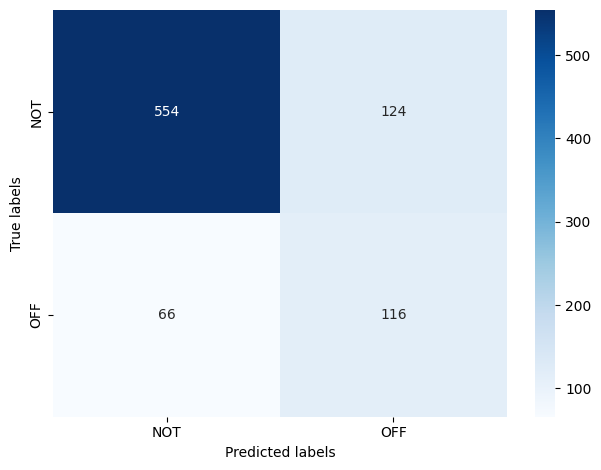

F1 Score(macro):  0.701691994245613
Accuracy:  0.7790697674418605
Recall(macro):  0.6884408602150538
Precision(macro):  0.727235890952705
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/25/output_test.csv


In [ ]:
print('Testing using model trained on 25% data')
test_method2(test_file, model_2_25_file, vectorizer_2_25_file, MODEL_2_25_DIRECTORY)

Let's see output of model trained on 25% data

In [ ]:
out_df = pd.read_csv(model_2_25_output_test_file)
out_df.head()

,Unnamed: 0,id,tweet,label,out_label
0,0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT
1,1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT


Let's test using model trained on 50% data.

Testing using model trained on 50% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/50/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/50/vectorizer.sav
Computing different preformance metrics on test  set of Dataset
TEST Confusion matrix


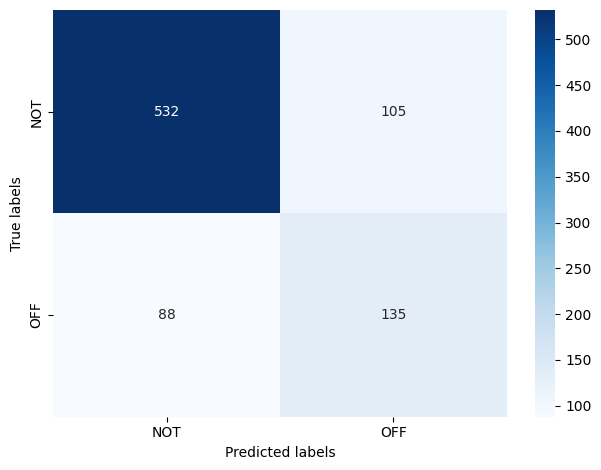

F1 Score(macro):  0.7148065863561464
Accuracy:  0.7755813953488372
Recall(macro):  0.7102822580645161
Precision(macro):  0.7202730005420588
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/50/output_test.csv


In [ ]:
print('Testing using model trained on 50% data')
test_method2(test_file, model_2_50_file, vectorizer_2_50_file, MODEL_2_50_DIRECTORY)

Let's see output of model trained on 50% data

In [ ]:
out_df = pd.read_csv(model_2_50_output_test_file)
out_df.head()

,Unnamed: 0,id,tweet,label,out_label
0,0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,OFF
1,1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT


Let's test using model trained on 75% data.

Testing using model trained on 75% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/75/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/75/vectorizer.sav
Computing different preformance metrics on test  set of Dataset
TEST Confusion matrix


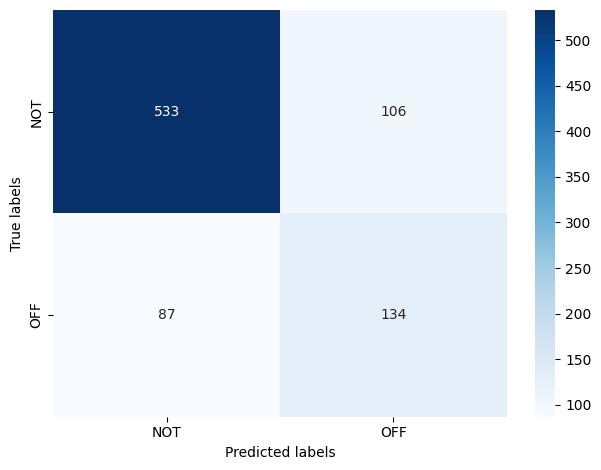

F1 Score(macro):  0.714024317753821
Accuracy:  0.7755813953488372
Recall(macro):  0.709005376344086
Precision(macro):  0.7202253237878755
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/75/output_test.csv


In [ ]:
print('Testing using model trained on 75% data')
test_method2(test_file, model_2_75_file, vectorizer_2_75_file, MODEL_2_75_DIRECTORY)

Let's see output of model trained on 75% data

In [ ]:
out_df = pd.read_csv(model_2_75_output_test_file)
out_df.head()

,Unnamed: 0,id,tweet,label,out_label
0,0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,OFF
1,1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,OFF
2,2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT


Let's test using model trained on 100% data.

Testing using model trained on 100% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/100/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/100/vectorizer.sav
Computing different preformance metrics on test  set of Dataset
TEST Confusion matrix


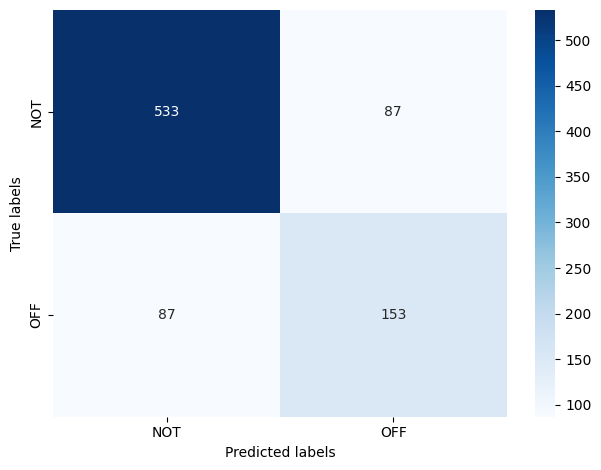

F1 Score(macro):  0.7485887096774193
Accuracy:  0.7976744186046512
Recall(macro):  0.7485887096774193
Precision(macro):  0.7485887096774193
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2200367/models/2/100/output_test.csv


In [ ]:
print('Testing using model trained on 100% data')
test_method2(test_file, model_2_100_file, vectorizer_2_100_file, MODEL_2_100_DIRECTORY)

Let's see output of model trained on 100% data

In [ ]:
out_df = pd.read_csv(model_2_100_output_test_file)
out_df.head()

,Unnamed: 0,id,tweet,label,out_label
0,0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,OFF
1,1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT


## Reference

https://huggingface.co/transformers/v3.2.0/custom_datasets.html
https://huggingface.co/transformers/v4.9.0/_modules/transformers/trainer.html
https://towardsdatascience.com/achieving-state-of-the-art-for-offensive-tweet-prediction-using-transformers-8245e571c769
https://paperswithcode.com/sota/text-classification-on-tweet-eval
https://huggingface.co/Tomas23/twitter-roberta-base-mar2022-finetuned-emotion
https://huggingface.co/cardiffnlp/twitter-roberta-base-mar2022